### Joining/Merging Data

Joining data is a very common operation when working with multiple tables.<br>


<br> Why do you think this is necessary?

<br>

If you are familiar with SQL, this section will be review for you.

There are four types of joins:
<ol> 
    <li> Inner Join </li>
    <li> Left (Outer) Join </li>
    <li> Right (Outer) Join </li>
    <li> Full (Outer) Join </li>

</ol>


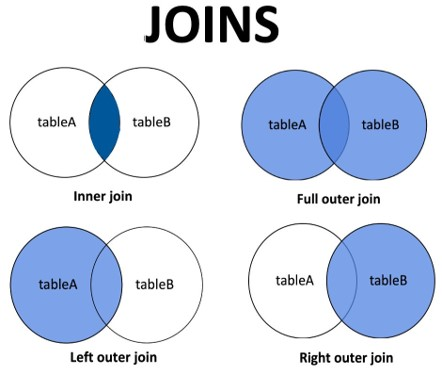

<br>

In [ ]:
# table => users (age, friends, interests)

# table => events (data, details, people in the event[user id's])

# table => groups ()

In [1]:
import numpy as np
import pandas as pd

#### Toy Example

In [4]:
# Creating dataframe a
#a = pd.DataFrame()  DONT NEED THIS 
 
# Creating Dictionary
d = {'id': [1, 2, 10, 12],
     'val1': ['a', 'b', 'c', 'd']}
 
#a is the dataframe     
a = pd.DataFrame(d)     

b = pd.DataFrame()
 
# Creating dictionary
d = {'id': [1, 2, 9, 8],
      'val1': ['p', 'q', 'r', 's']}
b = pd.DataFrame(d)

In [5]:
a


,id,val1
0,1,a
1,2,b
2,10,c
3,12,d


In [6]:
b


,id,val1
0,1,p
1,2,q
2,9,r
3,8,s


In [ ]:
pd.merge ()   #what is this called 
pd.DataFRame.merge() #what is this called 


In [7]:
a.merge(b, how='inner', on='id')

,id,val1_x,val1_y
0,1,a,p
1,2,b,q


In [8]:
pd.merge(a, b, how='left', on='id')   #a = right table b = left table  x = a table and y = b table

,id,val1_x,val1_y
0,1,a,p
1,2,b,q
2,10,c,NaN
3,12,d,NaN


In [9]:
pd.merge(a, b, how='right', on='id')  #give me everything from table B and join to table A.  X is B table and Y is A table

,id,val1_x,val1_y
0,1,a,p
1,2,b,q
2,9,NaN,r
3,8,NaN,s


In [10]:
a.merge(b, how='outer', on='id')  #keep all rows from both tables.  results will be as big as the biggest table

,id,val1_x,val1_y
0,1,a,p
1,2,b,q
2,10,c,NaN
3,12,d,NaN
4,9,NaN,r
5,8,NaN,s


#### Real-world Example

In [11]:
soil = pd.read_csv('soil_data.csv')
climate = pd.read_csv('climate_zones.csv')

In [13]:
soil.columns  #see all the columns in soil dataframe

Index(['fips', 'lat', 'lon', 'elevation', 'slope1', 'slope2', 'slope3',
       'slope4', 'slope5', 'slope6', 'slope7', 'slope8', 'aspectN', 'aspectE',
       'aspectS', 'aspectW', 'aspectUnknown', 'WAT_LAND', 'NVG_LAND',
       'URB_LAND', 'GRS_LAND', 'FOR_LAND', 'CULTRF_LAND', 'CULTIR_LAND',
       'CULT_LAND', 'SQ1', 'SQ2', 'SQ3', 'SQ4', 'SQ5', 'SQ6', 'SQ7'],
      dtype='object')

In [15]:
soil.fips

0        1001
1        1005
2        1003
3        1007
4        1009
        ...  
3104    56037
3105    56039
3106    56043
3107    56041
3108    56045
Name: fips, Length: 3109, dtype: int64

In [12]:
soil.head()

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,CULTRF_LAND,CULTIR_LAND,CULT_LAND,SQ1,SQ2,SQ3,SQ4,SQ5,SQ6,SQ7
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,56.293411,1.014811,57.308224,1,1,1,1,1,1,2
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,72.578804,1.828159,74.406960,3,2,1,1,1,1,1
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,59.843639,2.996914,62.840553,3,2,1,2,1,1,1
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1.916593,0.008330,1.924924,3,2,1,1,1,1,1
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1.891909,0.027488,1.919397,3,2,1,1,1,1,1


In [14]:
climate.head()

,State,State FIPS,County FIPS,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name
0,AK,2,13,7,NaN,Very Cold,Aleutians East
1,AK,2,16,7,NaN,Very Cold,Aleutians West
2,AK,2,20,7,NaN,Very Cold,Anchorage
3,AK,2,50,8,NaN,Subarctic,Bethel
4,AK,2,60,7,NaN,Very Cold,Bristol Bay


In [16]:
#county codes are max three digits
#We append the state code to the beginning

climate['Full FIPS'] = ( climate['State FIPS'].astype('str') + climate['County FIPS'].astype('str').str.rjust(3, '0') ).astype('int')

In [17]:
soil_fips = soil.fips

In [18]:
#There are more counties in our climate data than in our soil data
i = 0
for fips in climate['Full FIPS']:
    if fips not in soil_fips.values:
        #print(fips)
        i += 1
print(i)

126


In [19]:
climate.head()

,State,State FIPS,County FIPS,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name,Full FIPS
0,AK,2,13,7,NaN,Very Cold,Aleutians East,2013
1,AK,2,16,7,NaN,Very Cold,Aleutians West,2016
2,AK,2,20,7,NaN,Very Cold,Anchorage,2020
3,AK,2,50,8,NaN,Subarctic,Bethel,2050
4,AK,2,60,7,NaN,Very Cold,Bristol Bay,2060


In [20]:
#Now we want to left join soil with climate
soil.merge(climate, how='left', left_on='fips', right_on='Full FIPS')

,fips,lat,lon,elevation,slope1,slope2,slope3,slope4,slope5,slope6,...,SQ6,SQ7,State,State FIPS,County FIPS,IECC Climate Zone,IECC Moisture Regime,BA Climate Zone,County Name,Full FIPS
0,1001,32.536382,-86.644490,63,0.0419,0.2788,0.2984,0.2497,0.1142,0.0170,...,1,2,AL,1,1,3,A,Hot-Humid,Autauga,1001
1,1005,31.870670,-85.405456,146,0.0158,0.1868,0.5441,0.2424,0.0106,0.0003,...,1,1,AL,1,5,3,A,Hot-Humid,Barbour,1005
2,1003,30.659218,-87.746067,52,0.0746,0.4370,0.4415,0.0469,0.0000,0.0000,...,1,1,AL,1,3,2,A,Hot-Humid,Baldwin,1003
3,1007,33.015893,-87.127148,93,0.0144,0.1617,0.3714,0.3493,0.0898,0.0134,...,1,1,AL,1,7,3,A,Mixed-Humid,Bibb,1007
4,1009,33.977448,-86.567246,198,0.0050,0.0872,0.2799,0.3576,0.1477,0.1037,...,1,1,AL,1,9,3,A,Mixed-Humid,Blount,1009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3104,56037,41.660339,-108.875676,2085,0.0016,0.0281,0.1763,0.3554,0.2121,0.2097,...,1,3,WY,56,37,6,B,Cold,Sweetwater,56037
3105,56039,44.049321,-110.588102,2564,0.0003,0.0026,0.0166,0.0722,0.1489,0.5005,...,1,1,WY,56,39,7,NaN,Very Cold,Teton,56039
3106,56043,43.878831,-107.669052,1417,0.0034,0.0470,0.2331,0.4099,0.2064,0.0999,...,1,1,WY,56,43,6,B,Cold,Washakie,56043
3107,56041,41.284726,-110.558947,2327,0.0050,0.2009,0.4063,0.1858,0.0964,0.1031,...,1,2,WY,56,41,6,B,Cold,Uinta,56041
